In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import pyzx
from pyzx.circuit.qasmparser import QASMParser

In [16]:
qr0 = QuantumRegister(3, 'qr0')
qr1 = QuantumRegister(2, 'qr1')
qr2 = QuantumRegister(1, 'qr2')
qr3 = QuantumRegister(6, 'qr3')
cr0 = ClassicalRegister(2, 'cr0')
cr1 = ClassicalRegister(3, 'cr1')
qc = QuantumCircuit(qr3, qr1, qr0, qr2, cr0, cr1)
qc.x(8)
qc.h(2)
qc.cx(4,5)
print(qc)

               
qr3_0: |0>─────
               
qr3_1: |0>─────
          ┌───┐
qr3_2: |0>┤ H ├
          └───┘
qr3_3: |0>─────
               
qr3_4: |0>──■──
          ┌─┴─┐
qr3_5: |0>┤ X ├
          └───┘
qr1_0: |0>─────
               
qr1_1: |0>─────
          ┌───┐
qr0_0: |0>┤ X ├
          └───┘
qr0_1: |0>─────
               
qr0_2: |0>─────
               
qr2_0: |0>─────
               
 cr0_0: 0 ═════
               
 cr0_1: 0 ═════
               
 cr1_0: 0 ═════
               
 cr1_1: 0 ═════
               
 cr1_2: 0 ═════
               


In [17]:
qasm = qc.qasm()
print(qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr3[6];
qreg qr1[2];
qreg qr0[3];
qreg qr2[1];
creg cr0[2];
creg cr1[3];
x qr0[0];
h qr3[2];
cx qr3[4],qr3[5];



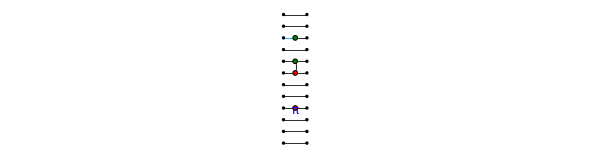

In [18]:
p = QASMParser()
circ = p.parse(qasm)
pyzx.draw(circ)

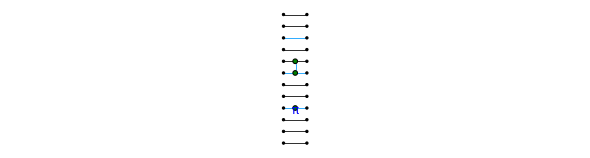

In [19]:
g = circ.to_graph()
pyzx.full_reduce(g)
pyzx.draw(g)

In [20]:
print("In this case, streaming_extract as usual results in a missing gate.\n")
new_circ = pyzx.extract.streaming_extract(g)

"""
prev = new_circ
next = pyzx.extract.streaming_extract(g)
while prev.gates != next.gates:
    for j in range(len(next.gates))[::-1]:
        # line below is identical to .add_gate, but is a method we added to prepend instead of append the gate
        new_circ.add_gate_to_front(next.gates[j])
    prev = next
    next = pyzx.extract.streaming_extract(g)
"""

new_circ = pyzx.optimize.basic_optimization(new_circ.to_basic_gates())
print(new_circ.to_qasm())

In this case, streaming_extract as usual results in a missing gate.

OPENQASM 2.0;
include "qelib1.inc";
qreg q[12];
cx q[4], q[5];
x q[8];



In [21]:
print("Compare to streaming_extract via the nested while-for loop below.\n")
p = QASMParser()
circ = p.parse(qasm)
pyzx.draw(circ)

g = circ.to_graph()
pyzx.full_reduce(g)
pyzx.draw(g)

new_circ = pyzx.extract.streaming_extract(g)

# Start of while-for loop
prev = new_circ
next = pyzx.extract.streaming_extract(g)
while prev.gates != next.gates:
    for j in range(len(next.gates))[::-1]:
        # line below is identical to .add_gate, but is a method we added to prepend instead of append the gate
        new_circ.add_gate_to_front(next.gates[j])
    prev = next
    next = pyzx.extract.streaming_extract(g)
# End of while-for loop

new_circ = pyzx.optimize.basic_optimization(new_circ.to_basic_gates())
print(new_circ.to_qasm())

Compare to streaming_extract via the nested while-for loop below.

OPENQASM 2.0;
include "qelib1.inc";
qreg q[12];
h q[2];
cx q[4], q[5];
x q[8];

